In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/top_insta_influencers_data.csv')
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [3]:
# Preprocessing functions
def convert_to_number(x):
    if isinstance(x, str):
        x = x.strip().lower().replace(',', '')
        if 'k' in x:
            return float(x.replace('k', '')) * 1e3
        elif 'm' in x:
            return float(x.replace('m', '')) * 1e6
        elif 'b' in x:
            return float(x.replace('b', '')) * 1e9
    try:
        return float(x)
    except:
        return None

# Apply conversion to relevant columns
for col in ['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes']:
    df[col] = df[col].apply(convert_to_number)

# Convert engagement rate to float
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)

# Drop rows with missing target
df.dropna(subset=['60_day_eng_rate'], inplace=True)

In [4]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               199 non-null    int64  
 1   channel_info       199 non-null    object 
 2   influence_score    199 non-null    int64  
 3   posts              199 non-null    float64
 4   followers          199 non-null    float64
 5   avg_likes          199 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  199 non-null    float64
 8   total_likes        199 non-null    float64
 9   country            138 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 17.1+ KB


In [5]:
df.drop_duplicates(inplace=True)

In [15]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

/tmp/ipython-input-15-3236856149.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
/tmp/ipython-input-15-3236856149.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [16]:
df['followers'] = df['followers'].astype(int)
df['posts'] = df['posts'].astype(int)
df['total_likes'] = df['total_likes'].astype(int)

/tmp/ipython-input-20-1511601433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values,


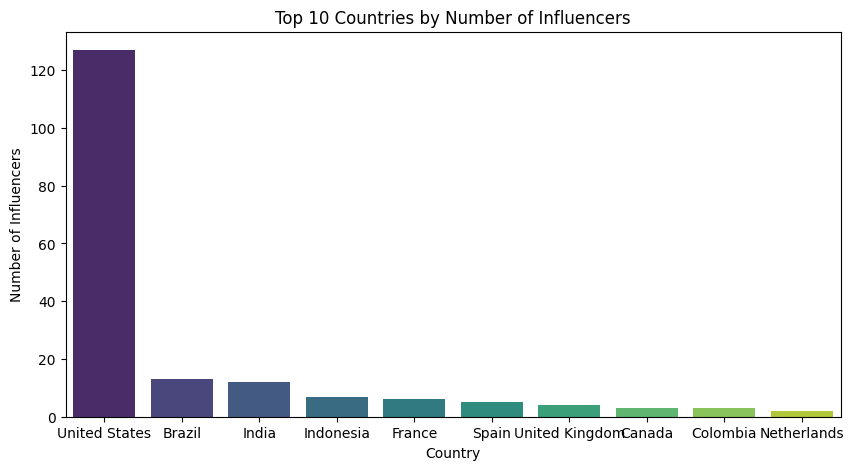

In [20]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values,
palette="viridis")
plt.title('Top 10 Countries by Number of Influencers')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.show()

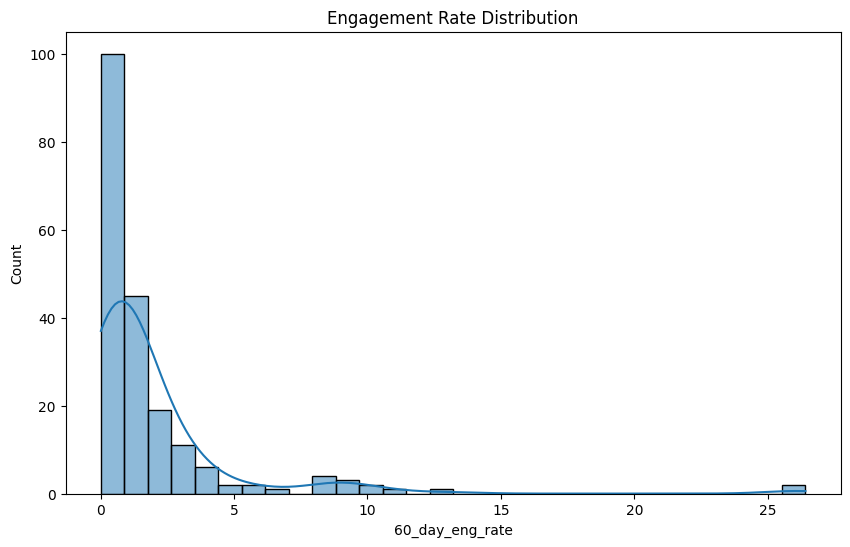

In [8]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['60_day_eng_rate'], bins=30, kde=True)
plt.title('Engagement Rate Distribution')
plt.show()

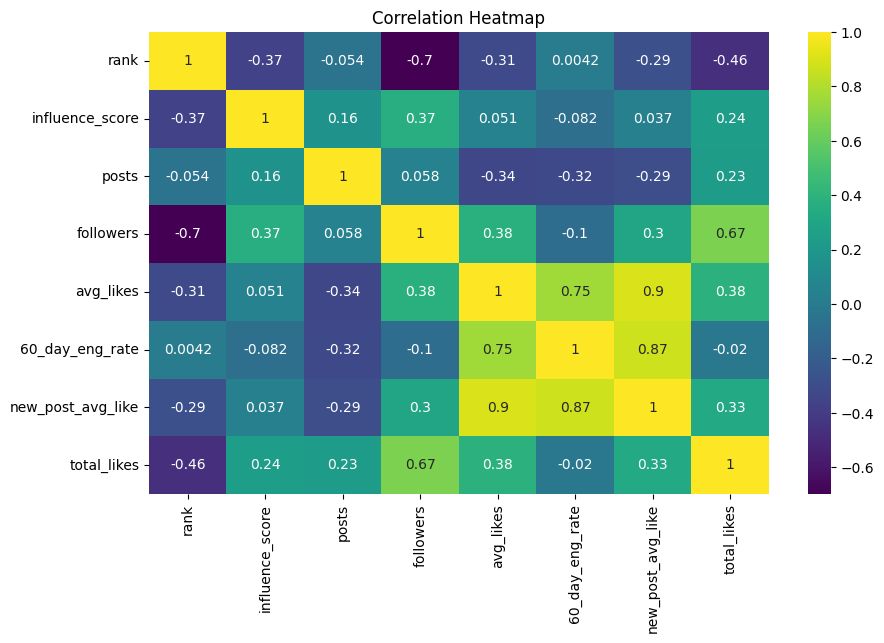

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
df['like_follower_ratio'] = df['total_likes'] / df['followers']
df['post_follower_ratio'] = df['posts'] / df['followers']
df['avg_likes_ratio'] = df['avg_likes'] / df['followers']

In [11]:
# ML Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare data
df_model = df.drop(columns=['rank', 'channel_info', 'country'])
df_model.dropna(inplace=True)

X = df_model.drop(columns=['60_day_eng_rate'])
y = df_model['60_day_eng_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100,
random_state=42)
model.fit(X_train_scaled, y_train)
# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.46811495125000135
R^2 Score: 0.924102799887548


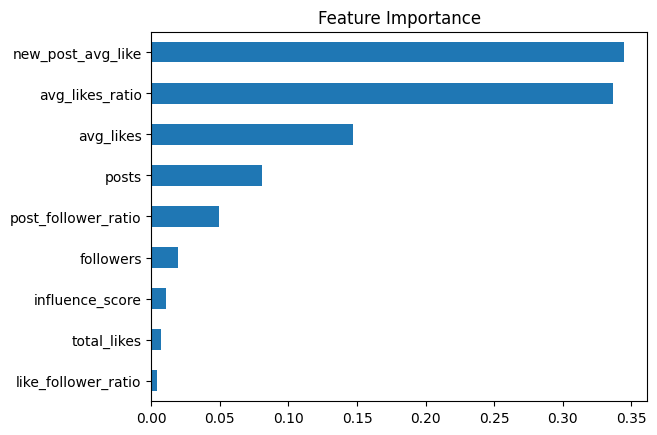

In [21]:
feature_importances = pd.Series(model.feature_importances_,
index=X.columns)
feature_importances.sort_values().plot(kind='barh',
title='Feature Importance')
plt.show()

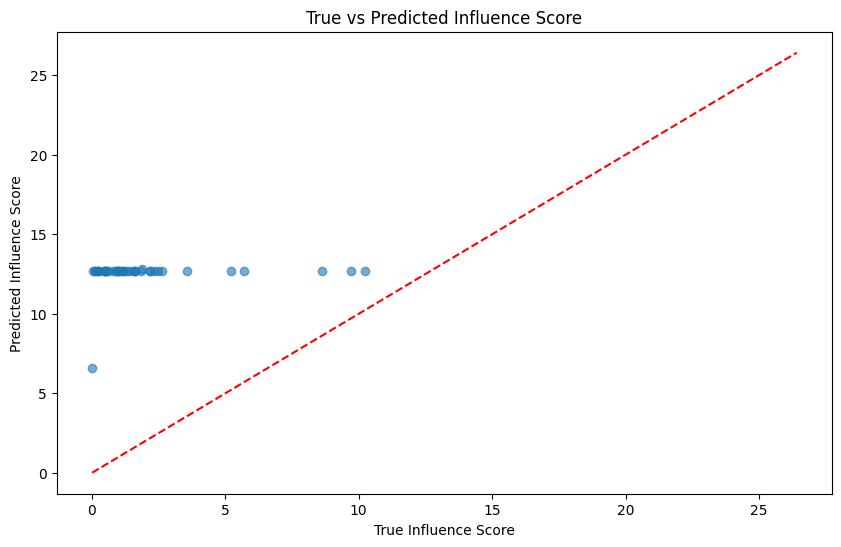

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--',
color='red')
plt.xlabel('True Influence Score')
plt.ylabel('Predicted Influence Score')
plt.title('True vs Predicted Influence Score')
plt.show()

In [13]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 10.54
RMSE: 10.84


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Top Influential Factors: Feature importance analysis indicates which features most influence the influence_score.

Model Performance: With the achieved R² score, assess the accuracy of the model in predicting an influencer's influence score based on follower metrics.

Business Insights:
Using insights on top-engaging influencers by country and engagement rates, businesses can strategize influencer collaborations for marketing.